# XGBoostで回帰問題を解く時、学習データに出現した範囲しか予測できない

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1.データ作成

In [3]:
df = pd.DataFrame(np.arange(6000), columns=['target'])

In [4]:
df['feature'] = df['target']

In [5]:
print(df.shape)
df.head()

(6000, 2)


,target,feature
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


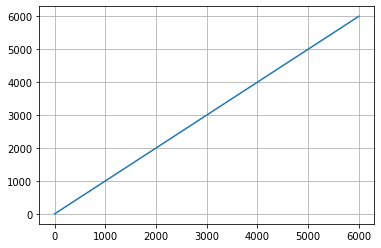

In [6]:
df['target'].plot(grid=True)

## 2.データ分割

In [7]:
X_train = pd.DataFrame(df['feature'][:4000])
y_train = df['target'][:4000]

X_valid = pd.DataFrame(df['feature'][4000:5000])
y_valid = df['target'][4000:5000]

X_test = pd.DataFrame(df['feature'][5000:])
y_test = df['target'][5000:]

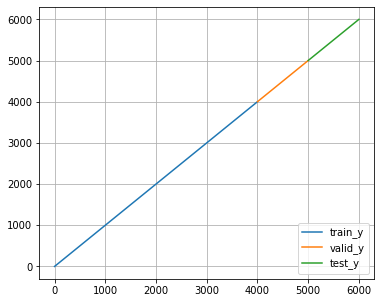

In [8]:
plt.figure(figsize=(6,5),facecolor="w")
plt.plot(y_train,label='train_y')
plt.plot(y_valid,label='valid_y')
plt.plot(y_test,label='test_y')
#plt.plot(y_pred_train,label='train_pred')
#plt.plot(y_pred_valid,label='valid_pred')
#plt.plot(y_pred_test,label='test_pred')
plt.grid(True)
plt.legend(loc="lower right", fontsize=10)

plt.show()

## 3.モデリング

## 3-1.線形回帰モデル

In [9]:
import statsmodels.formula.api as sm # 回帰分析のライブラリ

In [10]:
pd.concat([X_train, y_train], axis=1)

,feature,target
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
...,...,...
3995,3995,3995
3996,3996,3996
3997,3997,3997
3998,3998,3998


In [11]:
# 単回帰モデル1
#SLR = sm.ols(formula="target ~ feature", data=df).fit()
SLR = sm.ols(formula="target ~ feature", data=pd.concat([X_train, y_train], axis=1)).fit()
print(SLR.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.718e+33
Date:                Wed, 24 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:39:39   Log-Likelihood:             1.0413e+05
No. Observations:                4000   AIC:                        -2.083e+05
Df Residuals:                    3998   BIC:                        -2.082e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.819e-12   3.79e-14     48.033      0.0

In [12]:
SLR.fittedvalues

0       1.818989e-12
1       1.000000e+00
2       2.000000e+00
3       3.000000e+00
4       4.000000e+00
            ...     
3995    3.995000e+03
3996    3.996000e+03
3997    3.997000e+03
3998    3.998000e+03
3999    3.999000e+03
Length: 4000, dtype: float64

In [13]:
y_pred_test = SLR.predict(X_test)

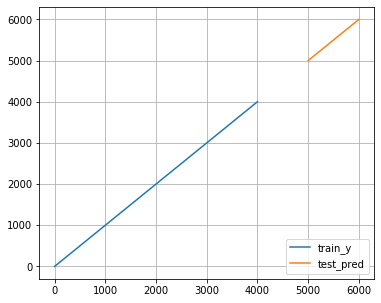

In [14]:
plt.figure(figsize=(6,5),facecolor="w")
plt.plot(y_train,label='train_y')
#plt.plot(y_valid,label='valid_y')
#plt.plot(y_test,label='test_y')
#plt.plot(y_pred_train,label='train_pred')
#plt.plot(y_pred_valid,label='valid_pred')
plt.plot(y_pred_test,label='test_pred')
plt.grid(True)
plt.legend(loc="lower right", fontsize=10)

plt.show()

## 3-2.XGBoost(回帰)

In [15]:
!pip install xgboost

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 173.5 MB 7.5 kB/s             


In [16]:
import xgboost as xgb

In [17]:
#回帰なのでXGBRegressorを利用
xgb_reg = xgb.XGBRegressor()

In [18]:
X_train.shape

(4000, 1)

In [19]:
y_train.shape

(4000,)

In [20]:
#eval_setには検証用データを設定する
#xgb_reg.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_test, y_test)])
xgb_reg.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[0]	validation_0-rmse:4388.23047
[1]	validation_0-rmse:3582.56982
[2]	validation_0-rmse:3005.33569
[3]	validation_0-rmse:2591.79419
[4]	validation_0-rmse:2292.76587
[5]	validation_0-rmse:2079.70361
[6]	validation_0-rmse:1933.42163
[7]	validation_0-rmse:1822.82385
[8]	validation_0-rmse:1743.17578
[9]	validation_0-rmse:1688.83521
[10]	validation_0-rmse:1646.98144
[11]	validation_0-rmse:1616.33850
[12]	validation_0-rmse:1594.14136
[13]	validation_0-rmse:1580.13391
[14]	validation_0-rmse:1569.25415
[15]	validation_0-rmse:1559.90405
[16]	validation_0-rmse:1552.86755
[17]	validation_0-rmse:1547.38306
[18]	validation_0-rmse:1545.58032
[19]	validation_0-rmse:1541.89795
[20]	validation_0-rmse:1541.03418
[21]	validation_0-rmse:1540.31030
[22]	validation_0-rmse:1537.94824
[23]	validation_0-rmse:1536.92822
[24]	validation_0-rmse:1536.46863
[25]	validation_0-rmse:1536.35181
[26]	validation_0-rmse:1536.26501
[27]	validation_0-rmse:1534.69397
[28]	validation_0-rmse:1534.67602
[29]	validation_0-rmse:1

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [21]:
y_pred_train = xgb_reg.predict(X_train)
y_pred_valid = xgb_reg.predict(X_valid)
y_pred_test  = xgb_reg.predict(X_test)

y_pred_train = pd.Series(y_pred_train, index=y_train.index)
y_pred_valid = pd.Series(y_pred_valid, index=y_valid.index)
y_pred_test  = pd.Series(y_pred_test,  index=y_test.index)

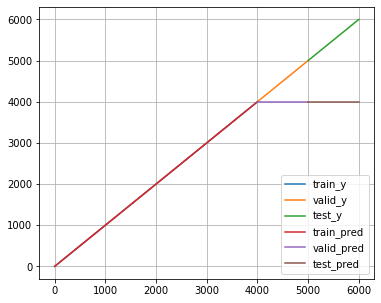

In [23]:
plt.figure(figsize=(6,5),facecolor="w")
plt.plot(y_train,label='train_y')
plt.plot(y_valid,label='valid_y')
plt.plot(y_test,label='test_y')
plt.plot(y_pred_train,label='train_pred')
plt.plot(y_pred_valid,label='valid_pred')
plt.plot(y_pred_test,label='test_pred')
plt.grid(True)
plt.legend(loc="lower right", fontsize=10)

plt.show()

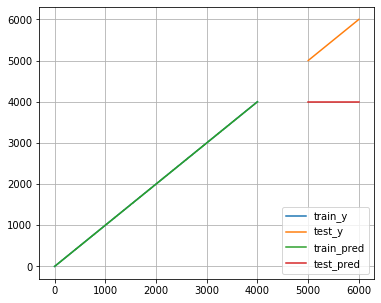

In [24]:
plt.figure(figsize=(6,5),facecolor="w")
plt.plot(y_train,label='train_y')
#plt.plot(y_valid,label='valid_y')
plt.plot(y_test,label='test_y')
plt.plot(y_pred_train,label='train_pred')
#plt.plot(y_pred_valid,label='valid_pred')
plt.plot(y_pred_test,label='test_pred')
plt.grid(True)
plt.legend(loc="lower right", fontsize=10)

plt.show()

# 結論
XGBoostは学習データに与えられたターゲット値の範囲でしか予測はできない。

## (使ったことないが) booster='gblinear'にした場合

In [26]:
#回帰なのでXGBRegressorを利用
xgb_reg2 = xgb.XGBRegressor(booster='gblinear')

In [27]:
xgb_reg2.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[0]	validation_0-rmse:2788.10815
[1]	validation_0-rmse:1934.58716
[2]	validation_0-rmse:1600.33813
[3]	validation_0-rmse:1416.72888
[4]	validation_0-rmse:1282.24841
[5]	validation_0-rmse:1168.45825
[6]	validation_0-rmse:1066.95435
[7]	validation_0-rmse:974.86896
[8]	validation_0-rmse:890.89557
[9]	validation_0-rmse:814.20026
[10]	validation_0-rmse:744.11975
[11]	validation_0-rmse:680.07483
[12]	validation_0-rmse:621.54321
[13]	validation_0-rmse:568.04901
[14]	validation_0-rmse:519.15918
[15]	validation_0-rmse:474.47693
[16]	validation_0-rmse:433.64029
[17]	validation_0-rmse:396.31863
[18]	validation_0-rmse:362.20923
[19]	validation_0-rmse:331.03519
[20]	validation_0-rmse:302.54425
[21]	validation_0-rmse:276.50534
[22]	validation_0-rmse:252.70758
[23]	validation_0-rmse:230.95772
[24]	validation_0-rmse:211.08025
[25]	validation_0-rmse:192.91309
[26]	validation_0-rmse:176.30977
[27]	validation_0-rmse:161.13557
[28]	validation_0-rmse:147.26718
[29]	validation_0-rmse:134.59244
[30]	validati

XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=-1,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.5, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=2, num_parallel_tree=None,
             objective='reg:squarederror', predictor=None, random_state=0,
             reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=None,
             tree_method=None, validate_parameters=1, verbosity=None)

In [28]:
y_pred_train2 = xgb_reg2.predict(X_train)
y_pred_valid2 = xgb_reg2.predict(X_valid)
y_pred_test2  = xgb_reg2.predict(X_test)

y_pred_train2 = pd.Series(y_pred_train2, index=y_train.index)
y_pred_valid2 = pd.Series(y_pred_valid2, index=y_valid.index)
y_pred_test2  = pd.Series(y_pred_test2,  index=y_test.index)

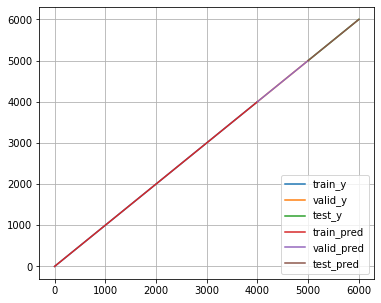

In [30]:
plt.figure(figsize=(6,5),facecolor="w")
plt.plot(y_train,label='train_y')
plt.plot(y_valid,label='valid_y')
plt.plot(y_test,label='test_y')
plt.plot(y_pred_train2,label='train_pred')
plt.plot(y_pred_valid2,label='valid_pred')
plt.plot(y_pred_test2,label='test_pred')
plt.grid(True)
plt.legend(loc="lower right", fontsize=10)

plt.show()